In [18]:
import pandas as pd
import numpy as np

In [2]:
treino = pd.read_csv('../dados/dados_treino.csv')
teste = pd.read_csv('../dados/dados_teste.csv')

In [8]:
treino = pd.get_dummies(treino, columns = ['Categoria'])
teste = pd.get_dummies(teste, columns = ['Categoria'])

In [11]:
lista_zip_treino = list(zip(treino['Categoria_Data Science'],
                            treino['Categoria_DevOps'],
                            treino['Categoria_Front-End'],
                            treino['Categoria_Inovação & Gestão'],
                            treino['Categoria_Mobile'],
                            treino['Categoria_Programação'],
                            treino['Categoria_UX & Design']
))

lista_zip_teste = list(zip(teste['Categoria_Data Science'],
                            teste['Categoria_DevOps'],
                            teste['Categoria_Front-End'],
                            teste['Categoria_Inovação & Gestão'],
                            teste['Categoria_Mobile'],
                            teste['Categoria_Programação'],
                            teste['Categoria_UX & Design']
))

treino['target'] = lista_zip_treino
teste['target'] = lista_zip_teste

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase= True, max_features= 3000, max_df = 0.80)

In [55]:
tfidf.fit(treino['texto'].astype('U'))

TfidfVectorizer(max_df=0.8, max_features=3000)

In [56]:
perguntas_treino = tfidf.transform(treino['texto'].astype('U'))

In [57]:
perguntas_teste = tfidf.transform(teste['texto'].astype('U'))

In [58]:
target_array_treino = np.asarray(list(treino['target']))
target_array_teste = np.asarray(list(teste['target']))

In [59]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression(max_iter=200)
classificador_onerest = OneVsRestClassifier(regressao_logistica)
classificador_onerest.fit(perguntas_treino, target_array_treino)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=200))

In [60]:
resultado_treino = classificador_onerest.score(perguntas_treino, target_array_treino)
resultado_teste = classificador_onerest.score(perguntas_teste, target_array_teste)

In [61]:
resultado_treino

0.5336071428571428

In [62]:
resultado_teste

0.49684813753581664

In [73]:
y_pred = classificador_onerest.predict(perguntas_teste)

In [64]:
from sklearn.metrics import confusion_matrix

In [67]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

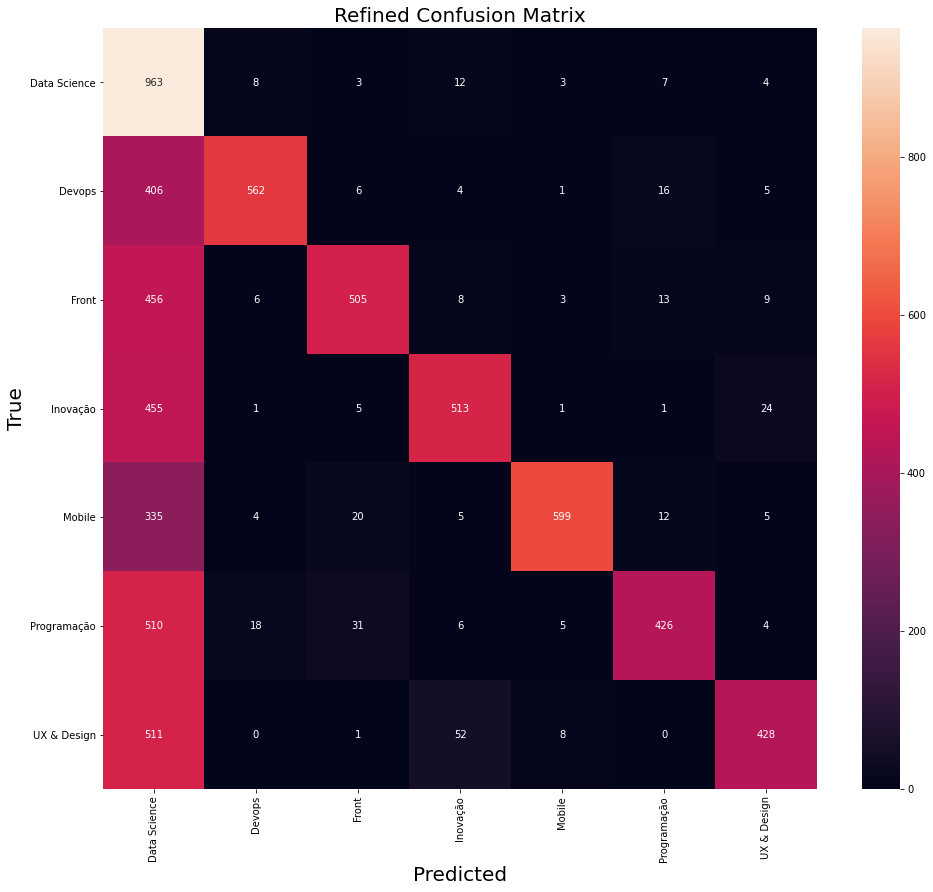

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=-1)

y_true=np.argmax(target_array_teste, axis=-1)

cm = confusion_matrix(y_true, y_pred)

## Get Class Labels
class_names = ['Data Science', 'Devops', 'Front', 'Inovação', 'Mobile', 'Programação', 'UX & Design']
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.show()

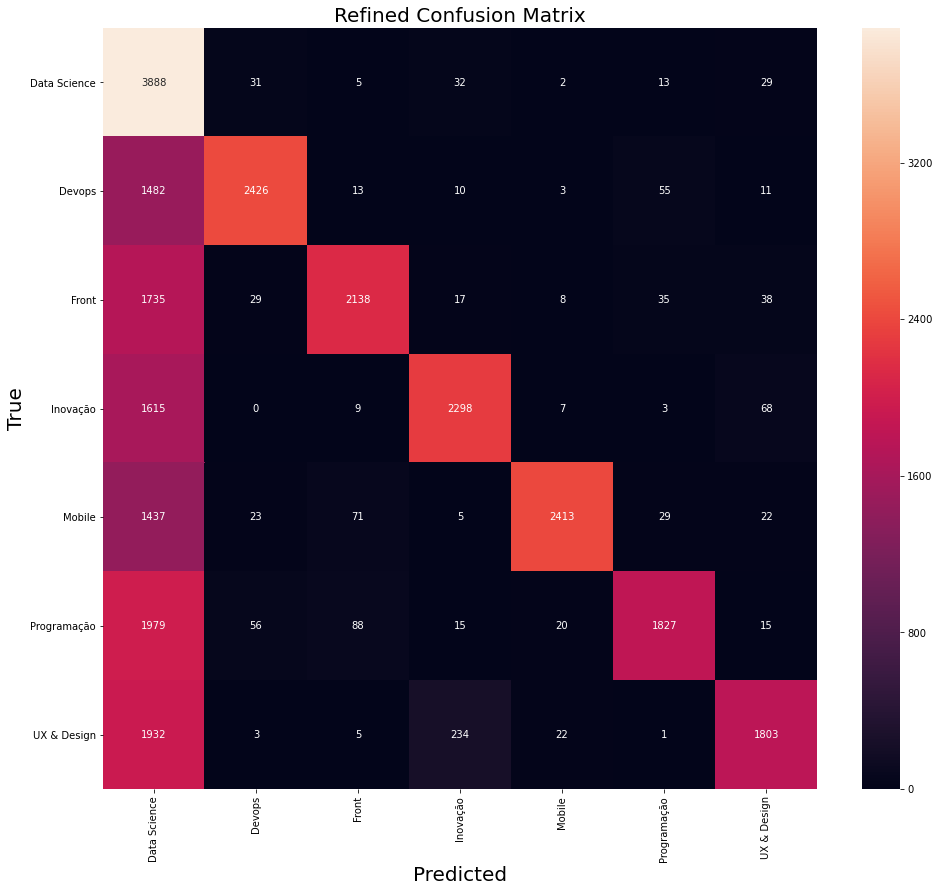

In [75]:
y_pred = np.argmax(classificador_onerest.predict(perguntas_treino), axis=-1)

y_true=np.argmax(target_array_treino, axis=-1)

cm = confusion_matrix(y_true, y_pred)

## Get Class Labels
class_names = ['Data Science', 'Devops', 'Front', 'Inovação', 'Mobile', 'Programação', 'UX & Design']
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.show()